In [2]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 

In [21]:
def setup_cc_axis(): 
    r""" 
    Setup a single subplot to plot CCSN yields as a function 
    of metallicity on. 
    """ 
    fig = plt.figure(figsize = (14, 7), facecolor = "white") 
    ax1 = fig.add_subplot(121) 
    ax2 = fig.add_subplot(122) 
    ax1.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
    ax2.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
    ax1.set_ylabel(r"$y_\text{N}^\text{CC}$") 
    ax2.set_ylabel(r"$\log_{10}\text{(N/O)}_\text{CC}$") 
    ax1.set_yscale("log") 
    ax1.set_xlim([-3.4, 0.8]) 
    ax2.set_xlim([-3.4, 0.8]) 
    ax1.set_ylim([3.e-7, 3.e-2]) 
    ax2.set_ylim([-4.4, -0.6]) 
    ax2.yaxis.set_ticks([-4, -3, -2, -1]) 
    return [ax1, ax2] 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this m

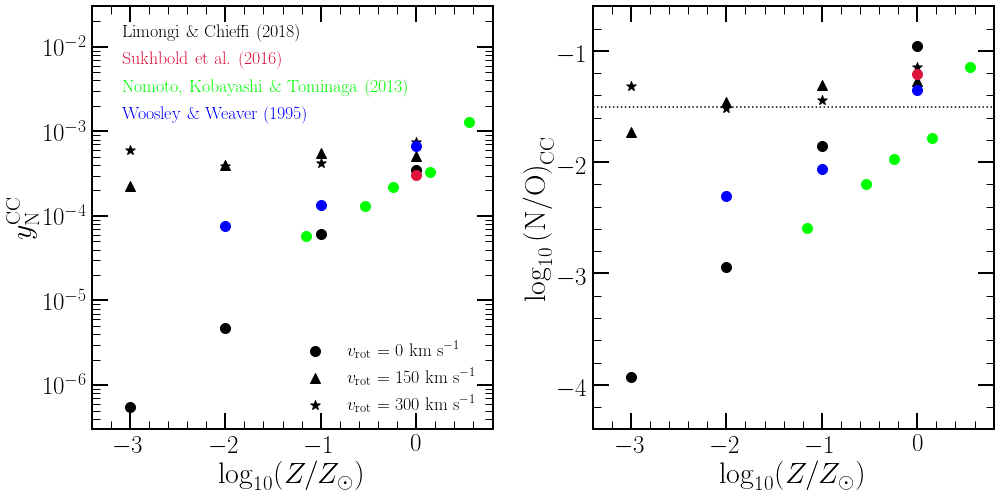

In [26]:
studies = ["LC18", "S16/W18", "NKT13", "WW95"] 
names = {
    "LC18": "Limongi \& Chieffi (2018)", 
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)", 
    "S16/W18": "Sukhbold et al. (2016)", 
    "WW95": "Woosley \& Weaver (1995)" 
}
metallicities = {
    "LC18": [-3, -2, -1, 0], 
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55], 
    "S16/W18": [0], 
    "WW95": [-4, -2, -1, 0] 
} 
rotation = {
    "LC18": [0, 150, 300], 
    "NKT13": [0], 
    "S16/W18": [0], 
    "WW95": [0] 
}
markers = {
    0: "circle", 
    150: "triangle_up", 
    300: "star" 
}
colors = {
    "LC18": "black", 
    "NKT13": "lime", 
    "S16/W18": "crimson", 
    "WW95": "blue" 
}
ax1, ax2 = setup_cc_axis() 
for i in studies: 
    for j in metallicities[i]: 
        for k in rotation[i]: 
            kwargs = {
                "c": plots.mpltoolkit.named_colors()[colors[i]], 
                "marker": plots.mpltoolkit.markers()[markers[k]], 
                "s": 100 
            }
            y_n_cc, _ = vice.yields.ccsne.fractional('n', study = i, MoverH = j, rotation = k) 
            y_o_cc, _ = vice.yields.ccsne.fractional('o', study = i, MoverH = j, rotation = k) 
            cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(14.007 / 15.999) 
            ax1.scatter(j, y_n_cc, **kwargs)
            ax2.scatter(j, cc_ratio, **kwargs) 
ax2.plot(ax2.get_xlim(), 2 * [-1.5], c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':') 
            
lines = len(studies) * [None] 
for i in range(len(lines)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[studies[i]]], 
        "label": names[studies[i]] 
    }
    lines[i] = ax1.plot([0, 0], [1, 1], **kwargs)[0] 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), fontsize = 18, ncol = 1, 
    frameon = False, handlelength = 0) 
ax1.add_artist(leg) 
for i in range(len(lines)): 
    leg.get_texts()[i].set_color(colors[studies[i]]) 
    leg.legendHandles[i].set_visible(False) 
    lines[i].remove() 
points = len(rotation["LC18"]) * [None] 
for i in range(len(points)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()["black"], 
        "marker": plots.mpltoolkit.markers()[markers[rotation["LC18"][i]]], 
        "label": r"$v_\text{rot}$ = %g km s$^{-1}$" % (rotation["LC18"][i]), 
        "s": 100 
    } 
    points[i] = ax1.scatter([0, 0], [1, 1], **kwargs) 
ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), fontsize = 18, ncol = 1, 
    frameon = False) 
for i in range(len(points)): 
    points[i].remove() 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0.25)
for ext in ["pdf", "png"]: plt.savefig("n_cc_yields.%s" % (ext)) 

In [4]:
def setup_axes(logprefactor = 3): 
    r""" 
    Setup 2 subplots to plot AGB yields as a function of progenitor mass 
    and metallicity on. 
    """ 
    fig = plt.figure(figsize = (14, 7), facecolor = "white") 
    ax1 = fig.add_subplot(121) 
    ax2 = fig.add_subplot(122) 
    for ax in [ax1, ax2]: 
        ax.set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
        ax.set_xlim([0.8, 6.8])
        ax.set_xticks(range(1, 7)) 
    ax1.set_ylabel(r"N Fractional Yield [$\times10^{-%d}$]" % (logprefactor))
    ax1.set_ylim([-0.2, 2.5]) 
    ax2.set_ylim([-1, 14])
    ax1.set_yticks([0, 1, 2]) 
    ax2.set_yticks([0, 2, 4, 6, 8, 10, 12])
    return [ax1, ax2] 

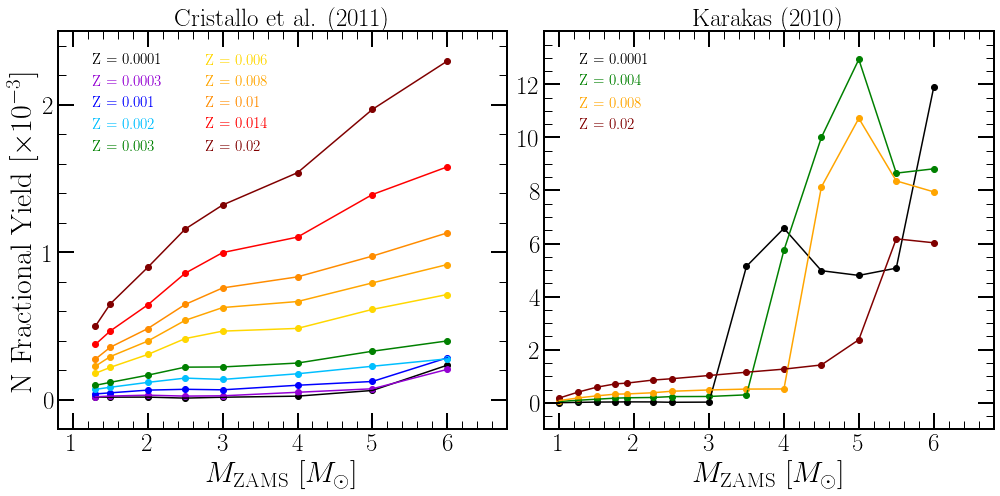

In [5]:
logprefactor = 3 
ax1, ax2 = setup_axes(logprefactor = logprefactor) 
ax1.set_title("Cristallo et al. (2011)", fontsize = 25) 
ax2.set_title("Karakas (2010)", fontsize = 25) 
colors = {
    "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
                    "green", "gold", "orange", "darkorange", "red", "maroon"], 
    "karakas10": ["black", "green", "orange", "maroon"] 
}
y, m, z = vice.yields.agb.grid('n') 
for i in range(len(z)): 
    yields = [10**logprefactor * _[i] for _ in y] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors["cristallo11"][i]] 
    }
    ax1.scatter(m, yields, **kwargs) 
    kwargs["label"] = "Z = %g" % (z[i]) 
    ax1.plot(m, yields, **kwargs) 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 2, frameon = False, 
    fontsize = 15, handlelength = 0, bbox_to_anchor = (0.02, 0.98))   
for i in range(len(z)): 
    leg.get_texts()[i].set_color(colors["cristallo11"][i]) 
    leg.legendHandles[i].set_visible(False) 

y, m, z = vice.yields.agb.grid('n', study = "karakas10") 
for i in range(len(z)): 
    yields = [10**logprefactor * _[i] for _ in y] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors["karakas10"][i]] 
    } 
    ax2.scatter(m, yields, **kwargs) 
    kwargs["label"] = "Z = %g" % (z[i]) 
    ax2.plot(m, yields, **kwargs) 
leg = ax2.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, frameon = False, 
    fontsize = 15, handlelength = 0, bbox_to_anchor = (0.02, 0.98))  
for i in range(len(z)): 
    leg.get_texts()[i].set_color(colors["karakas10"][i]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("n_agb_yields.%s" % (ext)) 

In [35]:
def setup_axis(logprefactor = 3): 
    fig = plt.figure(figsize = (7, 7), facecolor = "white")  
    ax = fig.add_subplot(111) 
    ax.set_xlabel(r"$M_\text{ZAMS} [M_\odot]$") 
    ax.set_ylabel(r"N Fractional Yield [$\times10^{-%d}$]" % (logprefactor)) 
    ax.set_ylim([-0.2, 2.5]) 
    ax.set_xlim([0.8, 6.8]) 
    ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6]) 
    ax.yaxis.set_ticks([0, 1, 2]) 
    return ax 

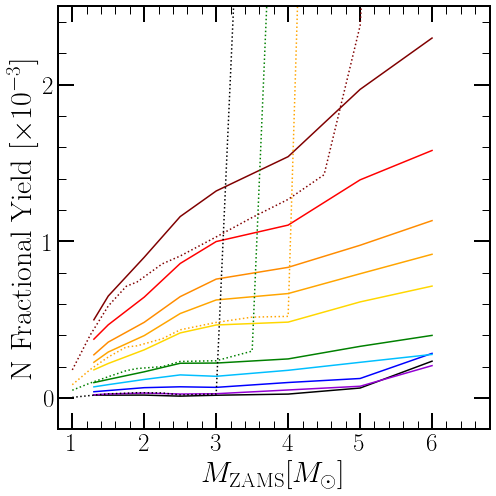

In [37]:
logprefactor = 3
linestyles = {
    "cristallo11": '-', 
    "karakas10": ':' 
}
colors = {
    "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
                    "green", "gold", "orange", "darkorange", "red", "maroon"], 
    "karakas10": ["black", "green", "orange", "maroon"] 
}
ax = setup_axis(logprefactor = logprefactor) 
for study in ["cristallo11", "karakas10"]: 
    y, m, z = vice.yields.agb.grid('n', study = study) 
    for i in range(len(z)): 
        yields = [10**logprefactor * _[i] for _ in y] 
        kwargs = {
            "c": plots.mpltoolkit.named_colors()[colors[study][i]], 
            "linestyle": linestyles[study] 
        } 
        ax.plot(m, yields, **kwargs) 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("n_agb_yields_comp.%s" % (ext)) 